# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pprint import pprint

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = len(combined_data['Mouse ID'].unique())
num_mice
               

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
num_unique_combinations = len(combined_data.groupby(['Mouse ID', 'Timepoint']))

print(f"The number of unique mouse ID and timepoint combinations in the dataset is: {num_unique_combinations}")

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
print("The following mice have duplicate entries:")
for mouse_id in duplicate_mice:
    print(mouse_id)


The number of unique mouse ID and timepoint combinations in the dataset is: 1888
The following mice have duplicate entries:
g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data['Mouse ID'] == 'g989']
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_data['Mouse ID'].unique())
num_mice

249

## Summary Statistics

In [7]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_data['Mouse ID'].unique())
num_mice

249

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={'mean': 'mean', 'median': 'median', 'var': 'var', 'std': 'std', 'sem': 'sem'})
summary_df= pd.DataFrame(summary_stats)
summary_df = summary_df.rename_axis("Tumor Volume (mm3)", axis='columns')
summary_df


Tumor Volume (mm3),mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

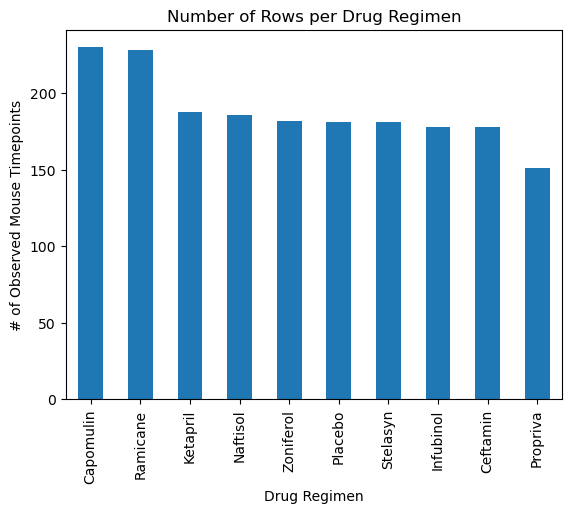

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the number of rows for each drug regimen
regimen_counts = clean_data['Drug Regimen'].value_counts()

# Generate the bar plot
regimen_counts.plot(kind='bar')

# Set the title and labels
plt.title('Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Display the plot
plt.show()

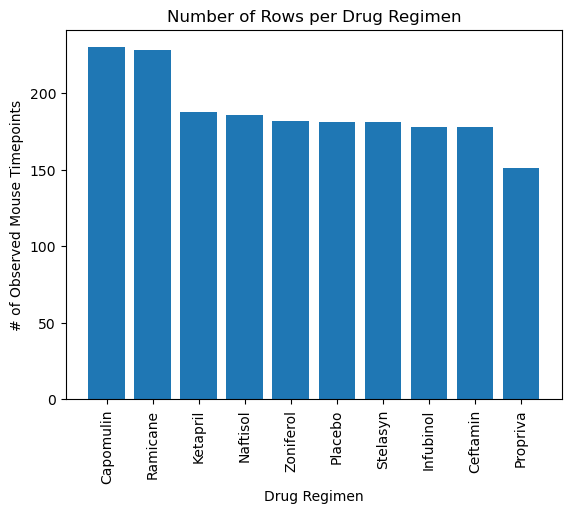

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Count the number of rows for each drug regimen
regimen_counts = clean_data['Drug Regimen'].value_counts()

# Generate the bar plot
plt.bar(regimen_counts.index, regimen_counts.values)

# Set the title and labels
plt.title('Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Display the plot
plt.show()

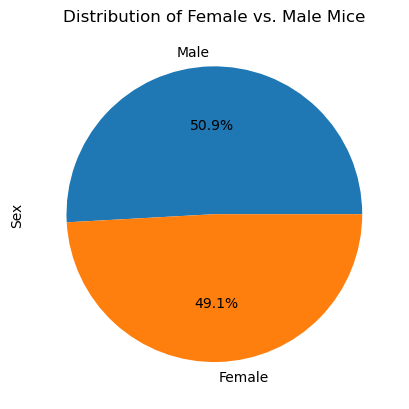

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of female and male mice
sex_counts = clean_data['Sex'].value_counts()

# Generate the pie plot
sex_counts.plot(kind='pie', autopct='%1.1f%%')

# Set the title
plt.title('Distribution of Female vs. Male Mice')

# Display the plot
plt.show()


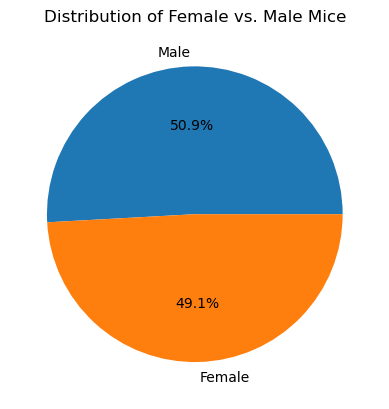

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count the number of female and male mice
sex_counts = clean_data['Sex'].value_counts()

# Generate the pie plot
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')

# Set the title
plt.title('Distribution of Female vs. Male Mice')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Create a list of the four treatment regimens # Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the clean_data dataframe to include only the specified treatment regimens
filtered_data = clean_data[clean_data['Drug Regimen'].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, filtered_data, on=['Mouse ID', 'Timepoint'])

# Display the final tumor volume of each mouse across the four treatment regimens
final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
final_tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in treatment_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']
    
    # Calculate the IQR for the tumor volumes
    quartiles = tumor_vol.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    
    # Print the results
    print(f"Summary for {regimen}:")
    print(f"   Lower Quartile: {lower_q:.2f}")
    print(f"   Upper Quartile: {upper_q:.2f}")
    print(f"   IQR: {iqr:.2f}")
    print(f"   Lower Bound: {lower_bound:.2f}")
    print(f"   Upper Bound: {upper_bound:.2f}")
    
    # Check for potential outliers
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    if outliers.empty:
        print("   No potential outliers.")
    else:
        print("   Potential outliers:")
        print(outliers)

Summary for Capomulin:
   Lower Quartile: 32.38
   Upper Quartile: 40.16
   IQR: 7.78
   Lower Bound: 20.70
   Upper Bound: 51.83
   No potential outliers.
Summary for Ramicane:
   Lower Quartile: 31.56
   Upper Quartile: 40.66
   IQR: 9.10
   Lower Bound: 17.91
   Upper Bound: 54.31
   No potential outliers.
Summary for Infubinol:
   Lower Quartile: 54.05
   Upper Quartile: 65.53
   IQR: 11.48
   Lower Bound: 36.83
   Upper Bound: 82.74
   Potential outliers:
15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Summary for Ceftamin:
   Lower Quartile: 48.72
   Upper Quartile: 64.30
   IQR: 15.58
   Lower Bound: 25.36
   Upper Bound: 87.67
   No potential outliers.


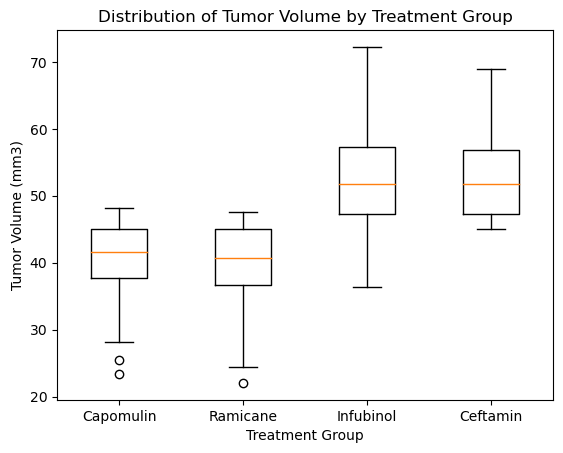

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

# Create a list of tumor volume data for each treatment group
tumor_vol_data = [clean_data.loc[clean_data['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']
                  for regimen in treatment_regimens]

# Generate the box plot
plt.boxplot(tumor_vol_data)

# Set the x-axis tick labels
plt.xticks(range(1, len(treatment_regimens) + 1), treatment_regimens)

# Set the title and labels
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()





## Line and Scatter Plots

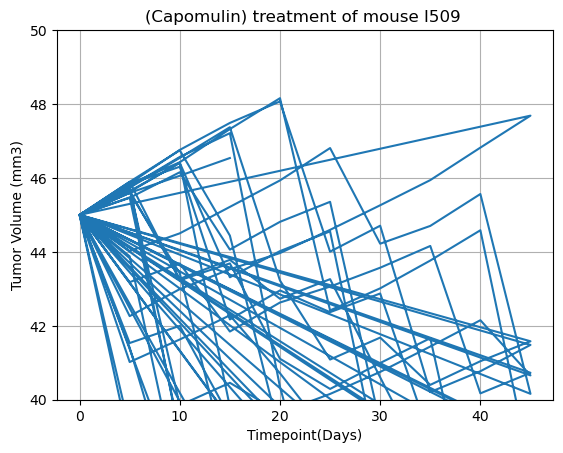

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Choose a single mouse ID treated with Capomulin
mouse_id = 'I509'

# Filter the clean_data dataframe to include only the data for the chosen mouse and Capomulin treatment
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse in the Capomulin regimen
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)']


#Extract Timepoints 
time_points = capomulin_data['Timepoint']
tumor_volumes = capomulin_data['Tumor Volume (mm3)']

# Create the line plot
plt.plot(time_points, tumor_volumes)
plt.xlabel('Timepoint(Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'(Capomulin) treatment of mouse {mouse_id} ')
plt.grid(True)

# Adjust the axis limits
plt.ylim(40, 50)
plt.xticks([0,10, 20, 30, 40])

# Display the plot
plt.show()


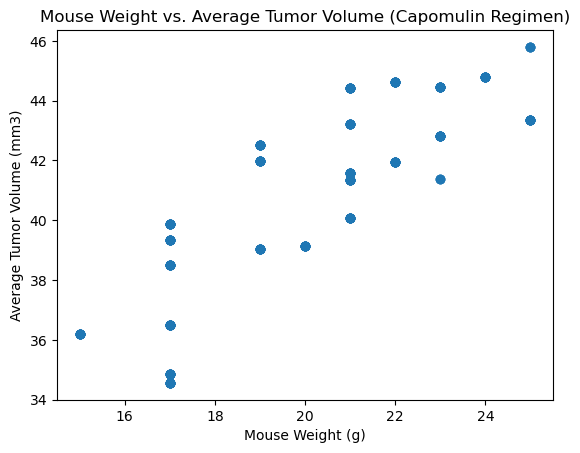

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a dataframe named 'data' with the required columns
# 'Weight (g)' and 'Tumor Volume (mm3)'

# Filter the data for only Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Group the data by mouse ID and calculate the average tumor volume
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume with the original dataframe to include mouse weight
merged_data = pd.merge(capomulin_data, average_tumor_volume, on='Mouse ID')

# Create the scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_y'])

# Set the axis labels
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Set the title of the plot
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

# Display the plot
plt.show()


## Correlation and Regression

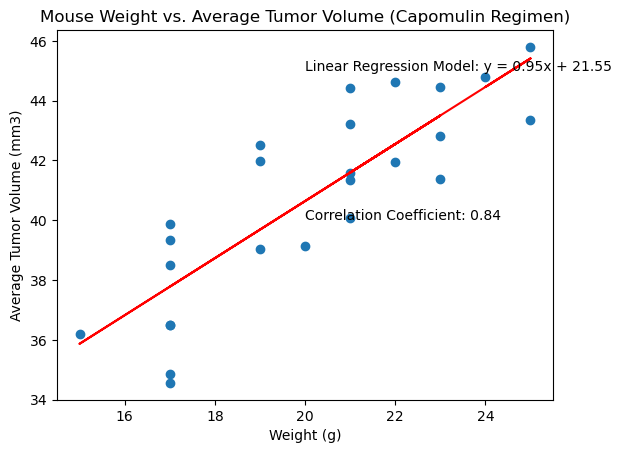

In [20]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Filter the clean_data dataframe to include only the data for the Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse in the Capomulin regimen
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume with the mouse metadata dataframe to include mouse weight
merged_data = pd.merge(mouse_metadata, average_tumor_volume, on='Mouse ID')

# Calculate the correlation coefficient
correlation = st.pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
correlation_coefficient = correlation[0]

# Generate the linear regression model
slope, intercept, rvalue, pvalue, stderr = st.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Create a scatter plot of mouse weight vs. average tumor volume
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Plot the linear regression line
regression_line = slope * merged_data['Weight (g)'] + intercept
plt.plot(merged_data['Weight (g)'], regression_line, color='red')

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the correlation coefficient and linear regression model on the plot
plt.text(20, 40, f"Correlation Coefficient: {correlation_coefficient:.2f}")
plt.text(20, 45, f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")

# Display the plot
plt.show()